**Background:** Virtually all quantitative research on military conflicts between states rely on *monadic* and *dyadic* features of states to predict/explain the occurence of conflicts. *Monadic* features are those that characterize states in isolation (e.g. whether a state is a democracy and the extent of its military power). *Dyadic* features are those that characterize the relation between state pairs (e.g. the distance between two states or whether they are jointly democratic). Extant research, however, overlooks that conflict might also be affected by the characteristics of the international system as whole. That is, extant research overlooks the potential role of *systemic* features in affecting the possibility of conflict between states.

**Aim:** This notebook aims to evaluate the information content of the *systemic* features in relation to interstate conflict. To that end, the predictive performace of two machine learning models are compared with one another. In the first model, the training is made based on the standard combination of monadic and dyadic features. In the second model, the training is made based on the combination of monadic, dyadic, and **systemic** features. The predictive performance of the second model relative to the first model is accordingly taken as an indication of the information content of the systemic features.

**Data:** The input data used to carry out the analysis include the largest 10 states in the international system. Each row of data include (1) the monadic and dyadic info on all the 10 states in a given year, and (2) whether the active dyad in the row has experienced a conflict at a specific level of intensity.

In [1]:
# reset variables
%reset -f

In [2]:
# all imports necessary for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neural_network import MLPClassifier

In [3]:
random.seed(12345)
np.random.seed(12345)

In [4]:
# read data
df_master = pd.read_csv('data/Directed complete graph of major powers.csv')

In [5]:
# check no missing values exist
df_master.isnull().values.any()

True

In [6]:
df_master.dropna(inplace=True)

In [7]:
df_master.shape

(8145, 391)

In [8]:
df_master.columns.values

array(['year', 'ccode_1', 'stateabb_1', 'statenme_1', 'cinc_1', 'democ_1',
       'ccode_2', 'stateabb_2', 'statenme_2', 'cinc_2', 'democ_2',
       'ccode_3', 'stateabb_3', 'statenme_3', 'cinc_3', 'democ_3',
       'ccode_4', 'stateabb_4', 'statenme_4', 'cinc_4', 'democ_4',
       'ccode_5', 'stateabb_5', 'statenme_5', 'cinc_5', 'democ_5',
       'ccode_6', 'stateabb_6', 'statenme_6', 'cinc_6', 'democ_6',
       'ccode_7', 'stateabb_7', 'statenme_7', 'cinc_7', 'democ_7',
       'ccode_8', 'stateabb_8', 'statenme_8', 'cinc_8', 'democ_8',
       'ccode_9', 'stateabb_9', 'statenme_9', 'cinc_9', 'democ_9',
       'ccode_10', 'stateabb_10', 'statenme_10', 'cinc_10', 'democ_10',
       'active_1', 'active_2', 'active_3', 'active_4', 'active_5',
       'active_6', 'active_7', 'active_8', 'active_9', 'active_10',
       'mid_1_2', 'defense_1_2', 'distance_capital_to_capital_1_2',
       'war_1_2', 'contigd_1_2', 'mid_display_force_1_2',
       'mid_use_force_1_2', 'mid_1_3', 'defense_1_3',
  

In [9]:
model_1_keywords = ('activated_cinc', 'activated_democ', 'activated_defense', 'activated_contigd', 'activated_dist')
model_2_keywords = ('cinc', 'democ', 'defense', 'contigd', 'distance')
model_1_df = df_master[[col for col in df_master.columns if any(word in col for word in model_1_keywords)]]
model_2_df = df_master[[col for col in df_master.columns if any(word in col for word in model_2_keywords)]]

In [10]:
model_1_df.head()

,activated_cinc_max,activated_cinc_min,activated_defense_max_min,activated_dist_C_to_C_max_min,activated_contigd_max_min
0,0.336619,0.164304,1,1555,0
1,0.336619,0.117286,0,212,1
2,0.336619,0.086052,1,766,0
3,0.336619,0.061359,0,1762,0
4,0.336619,0.052220,1,578,0


In [11]:
model_2_df.head()

,cinc_1,democ_1,cinc_2,democ_2,cinc_3,democ_3,cinc_4,democ_4,cinc_5,democ_5,...,defense_8_10,distance_capital_to_capital_8_10,contigd_8_10,defense_9_10,distance_capital_to_capital_9_10,contigd_9_10,activated_cinc_max,activated_cinc_min,activated_defense_max_min,activated_contigd_max_min
0,0.345664,0,0.168719,0.0,0.120437,0.0,0.088364,0.0,0.063008,0.0,...,0,909,0,0,4604,0,0.336619,0.164304,1,0
1,0.345664,0,0.168719,0.0,0.120437,0.0,0.088364,0.0,0.063008,0.0,...,0,909,0,0,4604,0,0.336619,0.117286,0,1
2,0.345664,0,0.168719,0.0,0.120437,0.0,0.088364,0.0,0.063008,0.0,...,0,909,0,0,4604,0,0.336619,0.086052,1,0
3,0.345664,0,0.168719,0.0,0.120437,0.0,0.088364,0.0,0.063008,0.0,...,0,909,0,0,4604,0,0.336619,0.061359,0,0
4,0.345664,0,0.168719,0.0,0.120437,0.0,0.088364,0.0,0.063008,0.0,...,0,909,0,0,4604,0,0.336619,0.052220,1,0


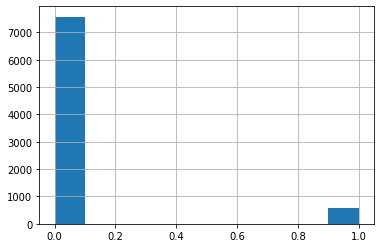

In [12]:
dep_var = df_master['activated_mid_max_min']
dep_var.hist()

In [13]:
clf = MLPClassifier(hidden_layer_sizes = (30, 30, 30))
stratkfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)

In [14]:
scores_model_1 = cross_validate(clf, model_1_df, dep_var, cv=stratkfold, n_jobs = -1, scoring='roc_auc')
scores_model_1['test_score'].mean()

0.5220161273875512

In [15]:
scores_model_2 = cross_validate(clf, model_2_df, dep_var, cv=stratkfold, n_jobs = -1, scoring='roc_auc')
scores_model_2['test_score'].mean()

0.5835214634976493

In [16]:
print("Accordingly, the predictive accuracy of model 2 (the systemic model) to that of model 1 is: %.2f" % (scores_model_2['test_score'].mean() / scores_model_1['test_score'].mean()))

Accordingly, the predictive accuracy of model 2 (the systemic model) to that of model 1 is: 1.12


### TO BE EXPADED .............